In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

import pickle

import warnings
warnings.filterwarnings('ignore')
print("Libraries imported")

Libraries imported


In [3]:
df0=pd.read_csv("C:\\Users\\vikas\\Desktop\\fliprobo\\Car Price Prediction\\cardata.csv")
print(" Dataset imported")

 Dataset imported


In [4]:
df0

,Unnamed: 0,car_model,year,kilometers_driven,fuel_type,transmission_type,price
0,0,Maruti Swift Dzire,2010,29667,Petrol,Manual,251299.0
1,1,Hyundai AURA,2021,1369,Petrol,Manual,636299.0
2,2,Maruti Wagon R 1.0,2013,35574,Petrol,Manual,278499.0
3,3,Maruti Wagon R 1.0,2011,35537,Petrol,Manual,211199.0
4,4,Maruti Swift,2020,16633,Petrol,Manual,566499.0
...,...,...,...,...,...,...,...
5180,5180,Renault TRIBER,2020,13066,Petrol,Automatic,646399.0
5181,5181,Maruti Vitara Brezza,2021,6025,Petrol,Automatic,1159699.0
5182,5182,Maruti Swift,2013,37446,Petrol,Manual,426099.0
5183,5183,Maruti Swift Dzire,2013,77395,Petrol,Manual,463299.0


In [5]:
df0.info()
## .info() gives all the details of each features like-datatype, number of rows and columns, null values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5185 entries, 0 to 5184
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5185 non-null   int64  
 1   car_model          5185 non-null   object 
 2   year               5185 non-null   int64  
 3   kilometers_driven  5185 non-null   int64  
 4   fuel_type          5185 non-null   object 
 5   transmission_type  4842 non-null   object 
 6   price              5002 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 283.7+ KB


In [6]:
# let's check null values 
df0.isnull().sum()

Unnamed: 0             0
car_model              0
year                   0
kilometers_driven      0
fuel_type              0
transmission_type    343
price                183
dtype: int64

## showing some null values, we will fill it by the use of mean, median and mode method

In [7]:
df0['transmission_type'] =df0['transmission_type'].fillna(df0['transmission_type'].mode()[0])
df0['price'] =df0['price'].fillna(df0['price'].mean())

In [8]:
print("shape of data set is ",df0.shape)

shape of data set is  (5185, 7)


### Rows are 5185 and Columns are 7 in this data set

## droping the "Unnamed: 0" column from the dataset

In [10]:
df0=df0.drop(['Unnamed: 0'],axis=1)

In [39]:
df1=df0.copy()

In [40]:
# Shape of dataset
print('Rows: {} Columns: {}'.format(df1.shape[0], df0.shape[1]))

Rows: 5185 Columns: 6


In [41]:
#checking shape & datatypes of the columns in data...
print(df1.shape)
print(' ')
print(df1.dtypes)

(5185, 6)
 
car_model             object
year                   int64
kilometers_driven      int64
fuel_type             object
transmission_type     object
price                float64
dtype: object


## three variable have object datatype and three have numerical datatype

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5185 entries, 0 to 5184
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_model          5185 non-null   object 
 1   year               5185 non-null   int64  
 2   kilometers_driven  5185 non-null   int64  
 3   fuel_type          5185 non-null   object 
 4   transmission_type  5185 non-null   object 
 5   price              5185 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 243.2+ KB


In [43]:
#total missing values
df1.isnull().sum()

car_model            0
year                 0
kilometers_driven    0
fuel_type            0
transmission_type    0
price                0
dtype: int64

## now containing zero null values.

In [44]:
# % of missing values
df1.isnull().sum()*100/df1.shape[0]

car_model            0.0
year                 0.0
kilometers_driven    0.0
fuel_type            0.0
transmission_type    0.0
price                0.0
dtype: float64

In [45]:
#counting total vaues of 0/zero entries in data...
df1[df1==1].count()

car_model            0
year                 0
kilometers_driven    0
fuel_type            0
transmission_type    0
price                0
dtype: int64

## given dataset's variable have no zero entries.

In [46]:
df1.describe(exclude=[object]).T

,count,mean,std,min,25%,50%,75%,max
year,5185.0,2017.612922,2.699599,2009.0,2016.0,2018.0,2020.0,2022.0
kilometers_driven,5185.0,39021.514176,24755.533011,67.0,18670.0,34538.0,56086.0,353288.0
price,5185.0,657095.830068,327193.106341,135099.0,437199.0,582499.0,762499.0,2278599.0


In [47]:
df1.describe(include=[object]).T

,count,unique,top,freq
car_model,5185,127,Maruti Baleno,356
fuel_type,5185,3,Petrol,4128
transmission_type,5185,2,Manual,4312


## Maruti baleno is the maxed featured car in this data set
## number of petrol variant car is maximum
## Number of manual car is maximum

# Visualization

Text(0.5, 1.0, '% different fuel types car')

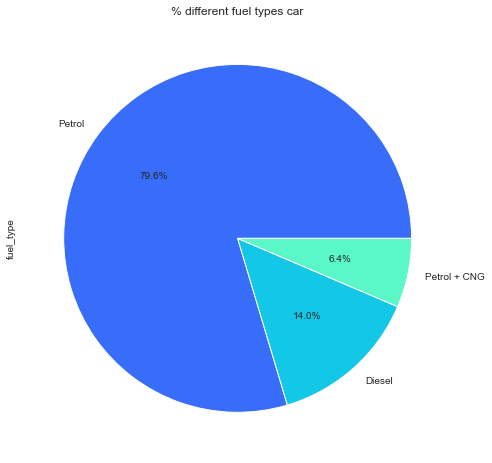

In [84]:
df1['fuel_type'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8));
plt.title("% different fuel types car")

### dominat number of vachile belong to petrol variant which is around 80% of the total vechile, second number belong to diesel variant and minimum is belong to hybrid model i.e., Petrol+CNG

Text(0.5, 1.0, '% different transmission_type car')

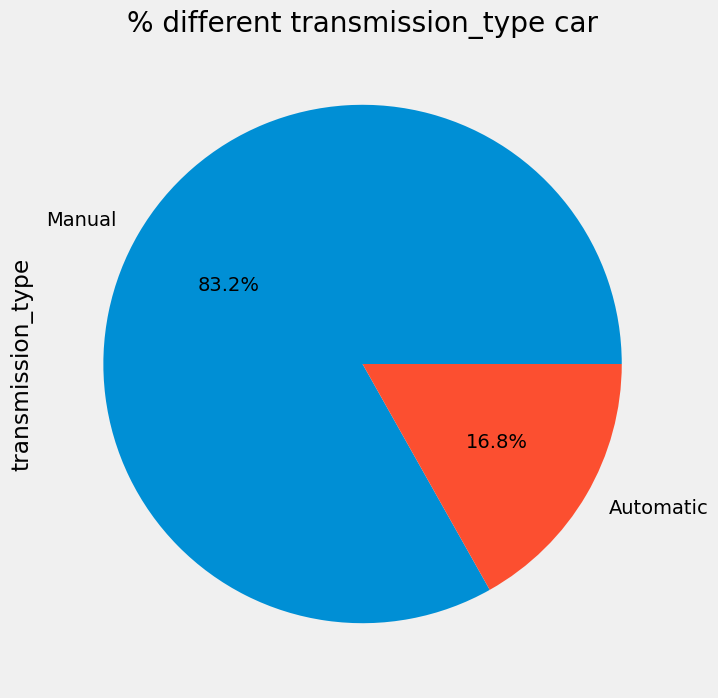

In [124]:
df1['transmission_type'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8));
plt.title("% different transmission_type car")

### As we can clearly see the number of Manual tranmission vechile is far more than the automatic transmission variants.

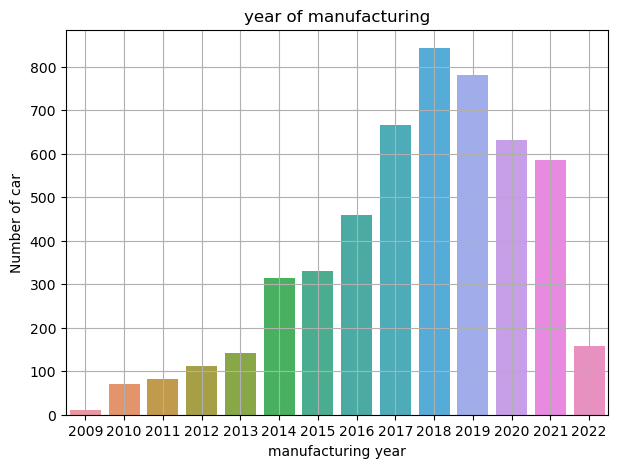

In [86]:
# Creating a barplot for 'year'
year = df1['year'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
sns.barplot(year.index, year.values)
plt.title('year of manufacturing')
plt.xlabel('manufacturing year')
plt.ylabel('Number of car')
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

## Maximum manufactured car belong to year 2018 and than 2019, 2017 and 2020. 

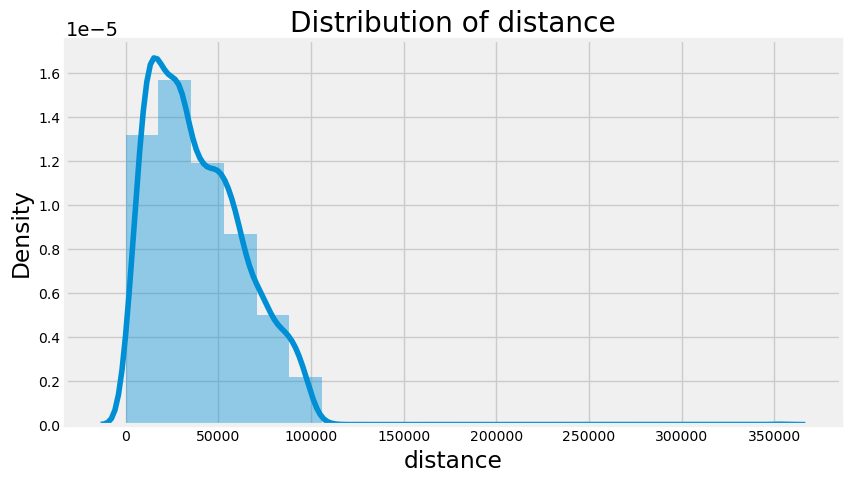

In [123]:
# Creating a distribution plot for 'distance'
kilometers_driven= df1['kilometers_driven'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(df1['kilometers_driven'], bins=20)
plt.title('Distribution of distance')
plt.xlabel('distance')
plt.tick_params(labelsize=10)
plt.show()

# target features

In [48]:
# Checking the counts of label categories
income = df1['price'].value_counts(normalize=True)
round(income * 100, 2).astype('str') + ' %'

657095.830068    3.53 %
492199.000000    0.29 %
342599.000000    0.29 %
568599.000000    0.23 %
507099.000000    0.21 %
                  ...  
773799.000000    0.02 %
808599.000000    0.02 %
493899.000000    0.02 %
445999.000000    0.02 %
296099.000000    0.02 %
Name: price, Length: 2441, dtype: object

In [49]:
target=df1['price'] 

In [50]:
target.describe()

count    5.185000e+03
mean     6.570958e+05
std      3.271931e+05
min      1.350990e+05
25%      4.371990e+05
50%      5.824990e+05
75%      7.624990e+05
max      2.278599e+06
Name: price, dtype: float64

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import scipy.stats
from scipy.stats import skew

### transforming target data

Text(0.5, 1.0, 'Sale Price after transformation')

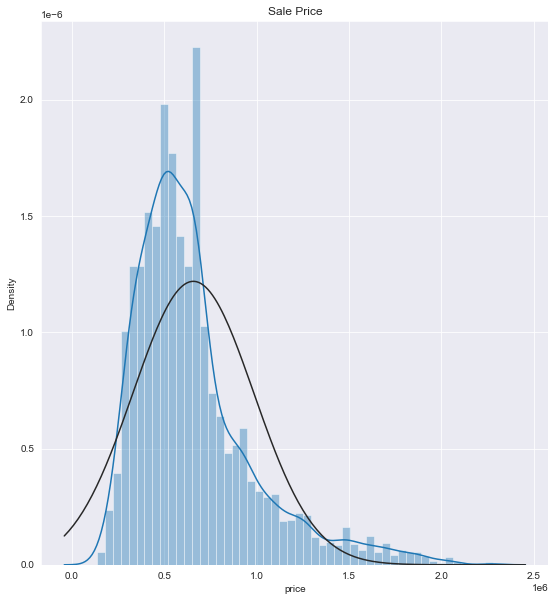

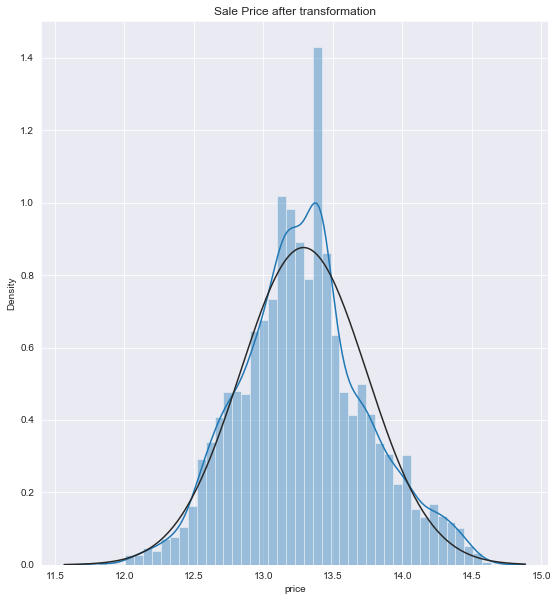

In [52]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(target,kde=True,fit=scipy.stats.norm)
plt.title("Sale Price")

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(np.log(target),kde=True,fit=scipy.stats.norm)
plt.title("Sale Price after transformation")

In [53]:
log_target=np.log(target)
final_target=np.exp(log_target)
final_target

0        251299.0
1        636299.0
2        278499.0
3        211199.0
4        566499.0
          ...    
5180     646399.0
5181    1159699.0
5182     426099.0
5183     463299.0
5184     296099.0
Name: price, Length: 5185, dtype: float64

### transforming the price of cars with log transformation

In [54]:
import scipy.stats
from scipy.stats import skew

In [55]:
df2=df1.drop(['price'],axis=1)

In [66]:
df3=df2.copy()

In [67]:
df3

,car_model,year,kilometers_driven,fuel_type,transmission_type
0,Maruti Swift Dzire,2010,29667,Petrol,Manual
1,Hyundai AURA,2021,1369,Petrol,Manual
2,Maruti Wagon R 1.0,2013,35574,Petrol,Manual
3,Maruti Wagon R 1.0,2011,35537,Petrol,Manual
4,Maruti Swift,2020,16633,Petrol,Manual
...,...,...,...,...,...
5180,Renault TRIBER,2020,13066,Petrol,Automatic
5181,Maruti Vitara Brezza,2021,6025,Petrol,Automatic
5182,Maruti Swift,2013,37446,Petrol,Manual
5183,Maruti Swift Dzire,2013,77395,Petrol,Manual


In [68]:
df3['year'].value_counts()

2018    843
2019    781
2017    665
2020    632
2021    586
2016    459
2015    331
2014    314
2022    158
2013    141
2012    111
2011     83
2010     71
2009     10
Name: year, dtype: int64

In [69]:
df3['fuel_type'].value_counts()

Petrol          4128
Diesel           724
Petrol + CNG     333
Name: fuel_type, dtype: int64

In [70]:
df3['transmission_type'].value_counts()

Manual       4312
Automatic     873
Name: transmission_type, dtype: int64

In [71]:
df3.skew()

year                -0.697768
kilometers_driven    0.899907
dtype: float64

In [72]:
df3['kilometers_driven']=np.sqrt(df3['kilometers_driven'])

## checking skewness value

In [73]:
df3.skew()

year                -0.697768
kilometers_driven   -0.044350
dtype: float64

In [74]:
df4=df3.copy()

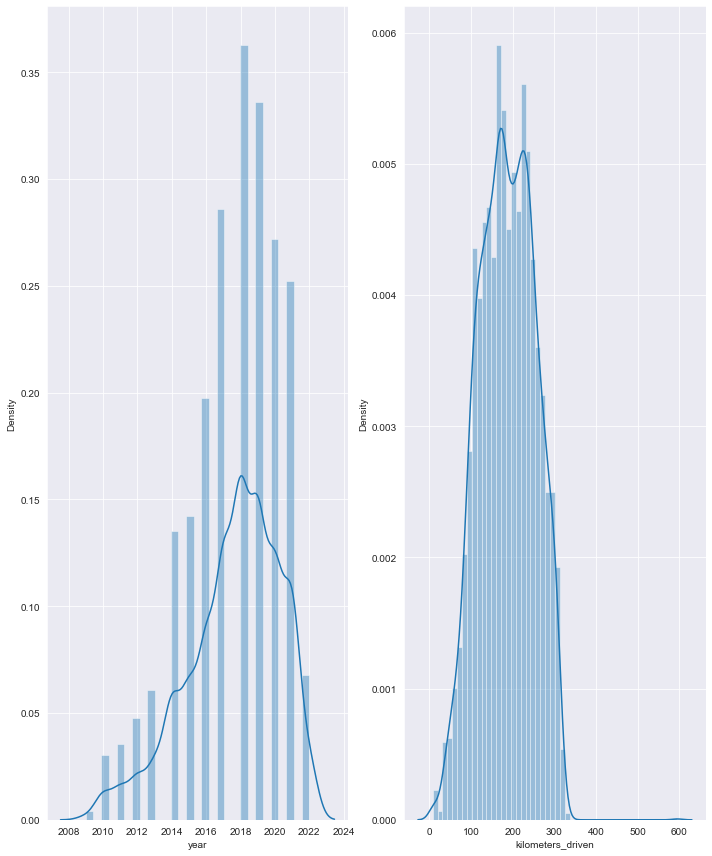

In [79]:
#distribution of numerical features.. 
i=0
plt.figure(figsize=(10,12))
for column in df4.select_dtypes(np.number).columns:
    plt.subplot(1,2,i+1)
    sns.distplot(df4[column])
    plt.xlabel(column,fontsize=10)
    i+=1
    
plt.tight_layout()

## Using outlier detection technique

In [80]:
def remove_outliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

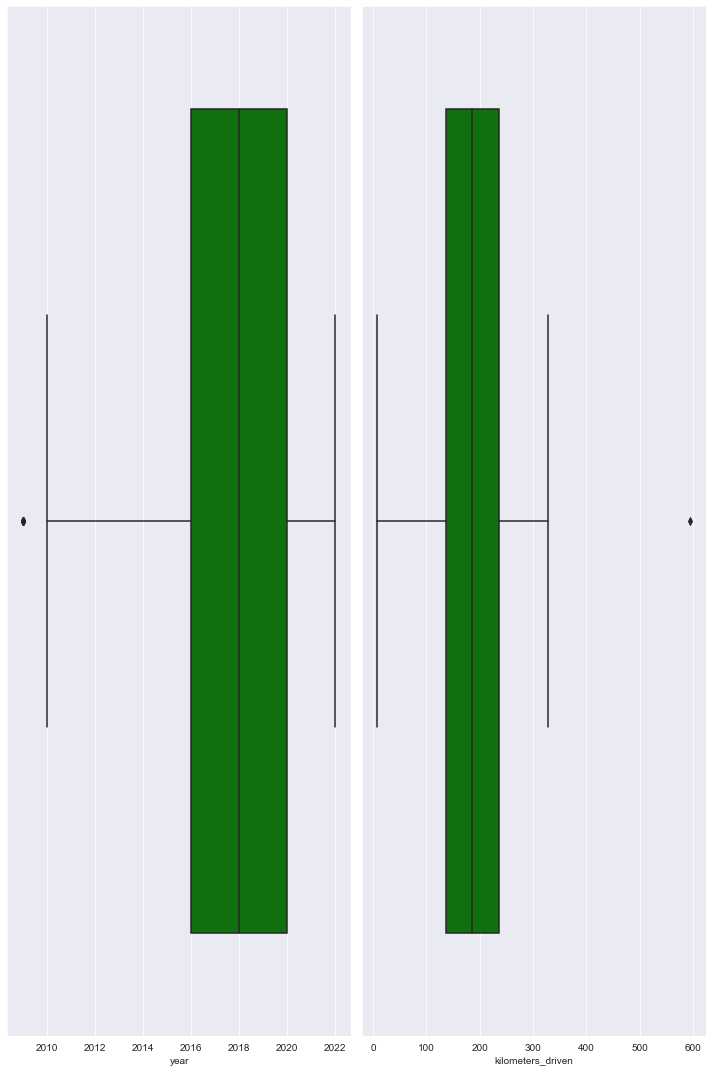

In [81]:
i=0
plt.figure(figsize=(10,15))
for column in df4.select_dtypes(np.number).columns:
    plt.subplot(1,2,i+1)
    sns.boxplot(df4[column],color='green',orient='h')
    plt.xlabel(column,fontsize=10)
    i+=1
    
plt.tight_layout()

### no outlier present in the numeric data of given dataset

## pair plot

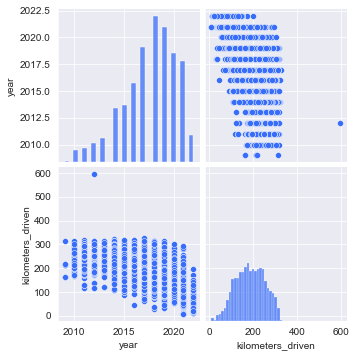

In [82]:
sns.set_palette('rainbow')
sns.pairplot(df4)

## heatmap

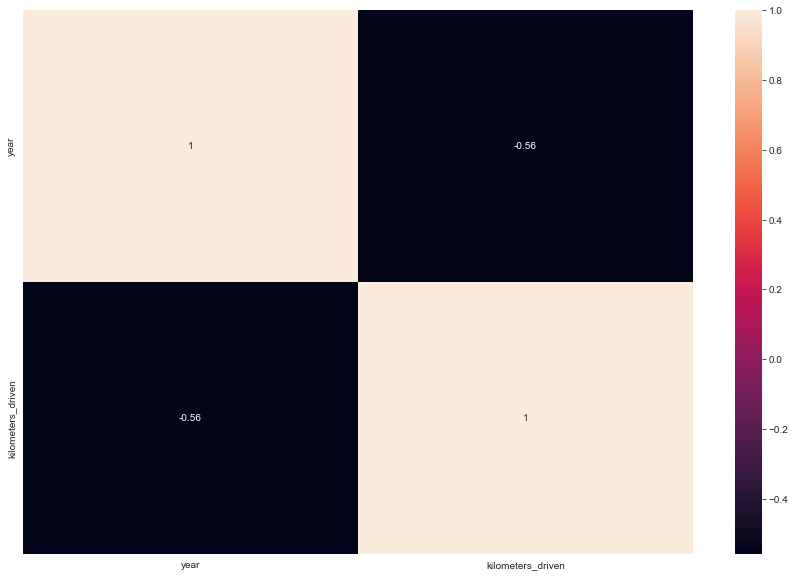

In [83]:
plt.figure(figsize = (15,10))
sns.heatmap(df4.corr(),annot=True)
plt.show()

## Encoding by onehotencoder

In [89]:
df4['fuel_type'] = pd.Categorical(df4['fuel_type'])
dfDummies_fuel_type = pd.get_dummies(df4['fuel_type'], prefix = 'fuel_type')
dfDummies_fuel_type

,fuel_type_Diesel,fuel_type_Petrol,fuel_type_Petrol + CNG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
5180,0,1,0
5181,0,1,0
5182,0,1,0
5183,0,1,0


In [90]:
df4 = pd.concat([df4, dfDummies_fuel_type], axis=1)
df4.drop(columns="fuel_type",inplace=True)
df4

,car_model,year,kilometers_driven,transmission_type,fuel_type_Diesel,fuel_type_Petrol,fuel_type_Petrol + CNG
0,Maruti Swift Dzire,2010,172.241110,Manual,0,1,0
1,Hyundai AURA,2021,37.000000,Manual,0,1,0
2,Maruti Wagon R 1.0,2013,188.610710,Manual,0,1,0
3,Maruti Wagon R 1.0,2011,188.512599,Manual,0,1,0
4,Maruti Swift,2020,128.968989,Manual,0,1,0
...,...,...,...,...,...,...,...
5180,Renault TRIBER,2020,114.306605,Automatic,0,1,0
5181,Maruti Vitara Brezza,2021,77.620873,Automatic,0,1,0
5182,Maruti Swift,2013,193.509690,Manual,0,1,0
5183,Maruti Swift Dzire,2013,278.199569,Manual,0,1,0


In [91]:
df4['transmission_type'] = pd.Categorical(df4['transmission_type'])
dfDummies_transmission_type = pd.get_dummies(df4['transmission_type'], prefix = 'fuel_type')
dfDummies_transmission_type

,fuel_type_Automatic,fuel_type_Manual
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
5180,1,0
5181,1,0
5182,0,1
5183,0,1


In [92]:
df4 = pd.concat([df4, dfDummies_transmission_type], axis=1)
df4.drop(columns="transmission_type",inplace=True)
df4

,car_model,year,kilometers_driven,fuel_type_Diesel,fuel_type_Petrol,fuel_type_Petrol + CNG,fuel_type_Automatic,fuel_type_Manual
0,Maruti Swift Dzire,2010,172.241110,0,1,0,0,1
1,Hyundai AURA,2021,37.000000,0,1,0,0,1
2,Maruti Wagon R 1.0,2013,188.610710,0,1,0,0,1
3,Maruti Wagon R 1.0,2011,188.512599,0,1,0,0,1
4,Maruti Swift,2020,128.968989,0,1,0,0,1
...,...,...,...,...,...,...,...,...
5180,Renault TRIBER,2020,114.306605,0,1,0,1,0
5181,Maruti Vitara Brezza,2021,77.620873,0,1,0,1,0
5182,Maruti Swift,2013,193.509690,0,1,0,0,1
5183,Maruti Swift Dzire,2013,278.199569,0,1,0,0,1


In [93]:
df4=df4.drop(['car_model'],axis=1)

In [94]:
df5=df4.copy()

## concating our taget and other feature data

In [95]:
df6=pd.concat([df5,final_target],axis=1)
df6

,year,kilometers_driven,fuel_type_Diesel,fuel_type_Petrol,fuel_type_Petrol + CNG,fuel_type_Automatic,fuel_type_Manual,price
0,2010,172.241110,0,1,0,0,1,251299.0
1,2021,37.000000,0,1,0,0,1,636299.0
2,2013,188.610710,0,1,0,0,1,278499.0
3,2011,188.512599,0,1,0,0,1,211199.0
4,2020,128.968989,0,1,0,0,1,566499.0
...,...,...,...,...,...,...,...,...
5180,2020,114.306605,0,1,0,1,0,646399.0
5181,2021,77.620873,0,1,0,1,0,1159699.0
5182,2013,193.509690,0,1,0,0,1,426099.0
5183,2013,278.199569,0,1,0,0,1,463299.0


## separating the target from other features

In [97]:
X=df6.drop('price',axis=1)
X

y=df6['price']
y

0        251299.0
1        636299.0
2        278499.0
3        211199.0
4        566499.0
          ...    
5180     646399.0
5181    1159699.0
5182     426099.0
5183     463299.0
5184     296099.0
Name: price, Length: 5185, dtype: float64

## spliting train test data

In [98]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
y_test = np.array(y_test,dtype = float)

## scaling the data by standard scaler

In [99]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [100]:
import sklearn.metrics as metrics

def regression_results(y_true, y_pred):
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    r2=r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1-r2)*(len(y_true)-1)/(len(y_true)-X_test.shape[1]-1)

    print('Explained_variance: ', round(explained_variance,4))    
    print('R2: ', round(r2,4))
    print('Adjusted_r2: ', round(adjusted_r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [101]:
from sklearn.model_selection import cross_val_score
def model_accuracy(model,X_train=X_train,y_train=y_train):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [102]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


## Model

## 1.LinearRegression

Explained_variance:  0.427
R2:  0.4266
Adjusted_r2:  0.4235
MAE:  173336.3776
MSE:  60181021981.5205
RMSE:  245318.2056
Accuracy: 45.20 %
Standard Deviation: 2.39 %


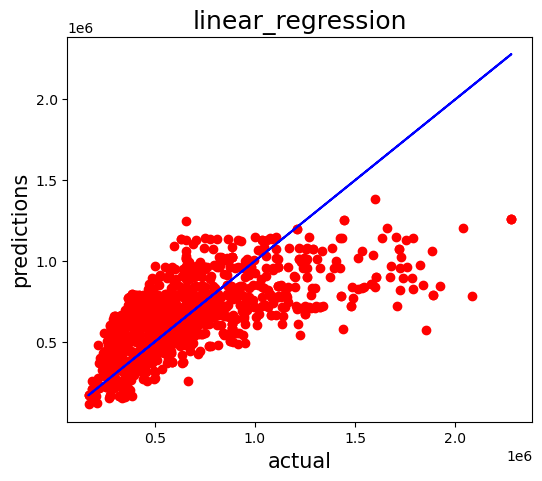

In [103]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
regression_results(y_test,y_pred)
model_accuracy(regressor)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('linear_regression', fontsize = 18)
plt.show()

## 2. RandomForestRegressor

Explained_variance:  0.6214
R2:  0.6198
Adjusted_r2:  0.6177
MAE:  111104.9625
MSE:  39910458090.9337
RMSE:  199776.0198
Accuracy: 64.64 %
Standard Deviation: 2.93 %


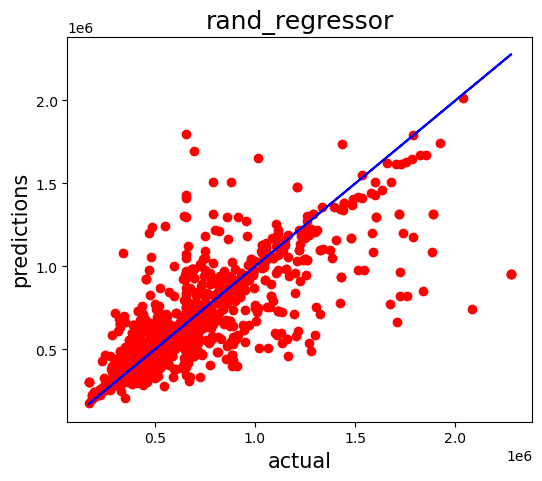

In [104]:
rand_regressor = RandomForestRegressor()
rand_regressor.fit(X_train, y_train)
y_pred_rf = rand_regressor.predict(X_test)
regression_results(y_test,y_pred_rf)
model_accuracy(rand_regressor)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_rf, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('rand_regressor', fontsize = 18)
plt.show()

## 3. DecisionTreeRegressor

Explained_variance:  0.5529
R2:  0.551
Adjusted_r2:  0.5486
MAE:  92824.7741
MSE:  47122909135.2476
RMSE:  217078.1176
Accuracy: 55.96 %
Standard Deviation: 4.03 %


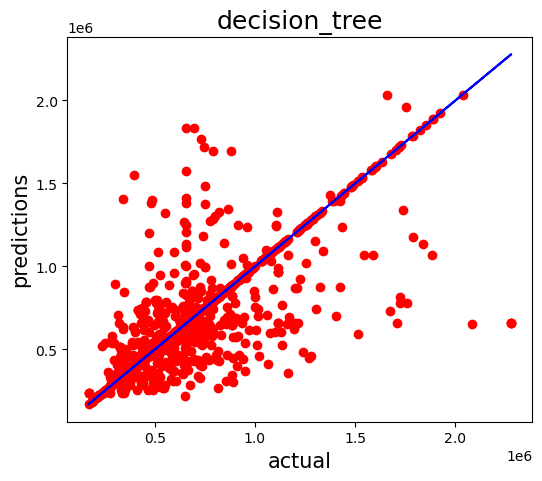

In [105]:
from sklearn.tree import DecisionTreeRegressor

decision_tree=DecisionTreeRegressor(criterion='mse',splitter='random',random_state=10)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
regression_results(y_test,y_pred_dt)
model_accuracy(decision_tree)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_dt, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('decision_tree', fontsize = 18)
plt.show()


## 4.SVR

Explained_variance:  0.0009
R2:  -0.0604
Adjusted_r2:  -0.0661
MAE:  227403.2255
MSE:  111296212787.9657
RMSE:  333610.8703
Accuracy: -5.26 %
Standard Deviation: 1.28 %


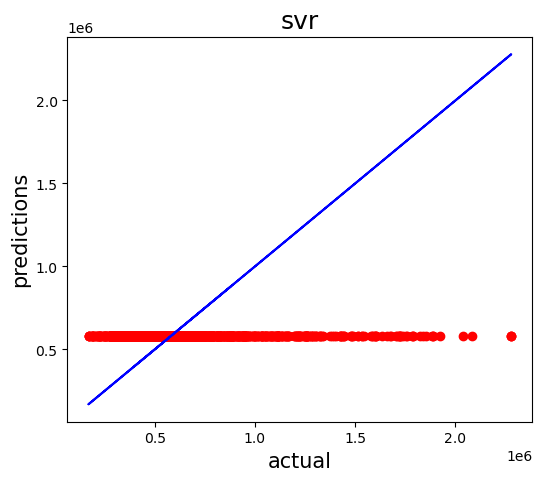

In [106]:
from sklearn.svm import SVR

svr=SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

regression_results(y_test,y_pred_svr)
model_accuracy(svr)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_svr, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('svr', fontsize = 18)
plt.show()

## 5.KNeighborsRegressor

Explained_variance:  0.5632
R2:  0.5617
Adjusted_r2:  0.5593
MAE:  114598.922
MSE:  46008562155.8453
RMSE:  214496.0656
Accuracy: 56.71 %
Standard Deviation: 3.88 %


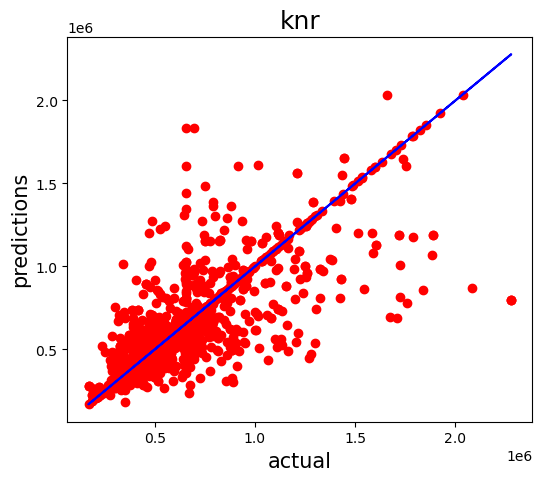

In [107]:
from sklearn.neighbors import KNeighborsRegressor

knr=KNeighborsRegressor(n_neighbors=2)
knr.fit(X_train, y_train)
y_pred_knr = knr.predict(X_test)

regression_results(y_test,y_pred_knr)
model_accuracy(knr)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_knr, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('knr', fontsize = 18)
plt.show()

## 6. XGBRegressor

Explained_variance:  0.6167
R2:  0.6151
Adjusted_r2:  0.613
MAE:  129581.4118
MSE:  40403049848.7953
RMSE:  201005.0991
Accuracy: 63.98 %
Standard Deviation: 2.04 %


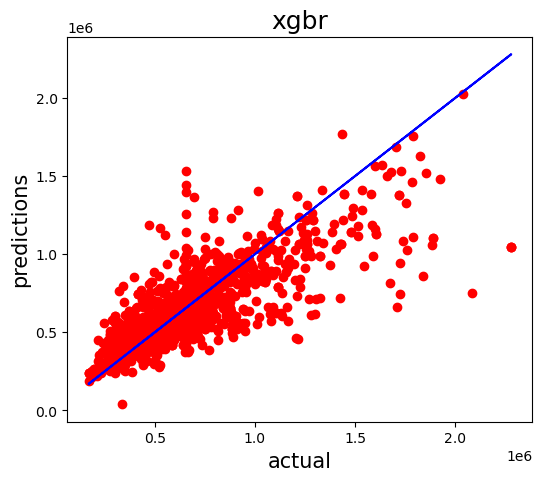

In [108]:
from xgboost import XGBRegressor
xgbr=XGBRegressor(random_state=10)
xgbr.fit(X_train, y_train)
y_pred_xgbr = xgbr.predict(X_test)

regression_results(y_test,y_pred_xgbr)
model_accuracy(xgbr)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_xgbr, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('xgbr', fontsize = 18)
plt.show()

## 7.Lasso

Explained_variance:  0.427
R2:  0.4266
Adjusted_r2:  0.4235
MAE:  173336.2309
MSE:  60181055215.0438
RMSE:  245318.2733
Accuracy: 45.18 %
Standard Deviation: 2.43 %


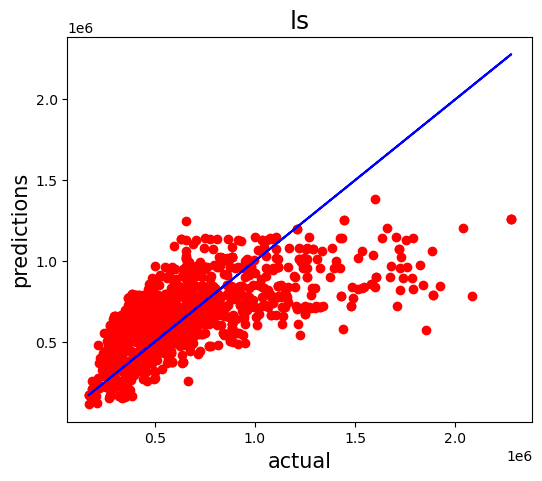

In [109]:
ls = Lasso()
ls=Lasso(random_state=10)
ls.fit(X_train, y_train)
y_pred_ls = ls.predict(X_test)

regression_results(y_test,y_pred_ls)
model_accuracy(ls)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_ls, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('ls', fontsize = 18)
plt.show()

## 8. Ridge

Explained_variance:  0.427
R2:  0.4266
Adjusted_r2:  0.4235
MAE:  173327.9116
MSE:  60180354944.9183
RMSE:  245316.846
Accuracy: 45.19 %
Standard Deviation: 2.43 %


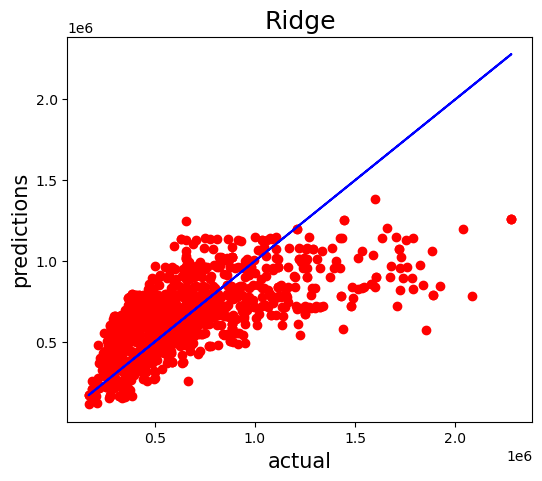

In [110]:
rd = Ridge()
rd=Ridge(random_state=10)
rd.fit(X_train, y_train)
y_pred_rd = rd.predict(X_test)

regression_results(y_test,y_pred_rd)
model_accuracy(rd)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_rd, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('Ridge', fontsize = 18)
plt.show()

## 9. AdaBoostRegressor

Explained_variance:  0.4142
R2:  0.3164
Adjusted_r2:  0.3127
MAE:  211656.4315
MSE:  71754581182.1588
RMSE:  267870.456
Accuracy: 36.39 %
Standard Deviation: 5.89 %


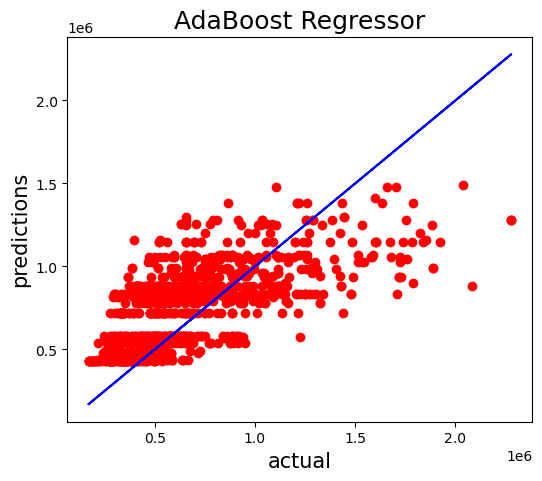

In [111]:
abr = AdaBoostRegressor()
abr=AdaBoostRegressor(random_state=10)
abr.fit(X_train, y_train)
y_pred_abr = abr.predict(X_test)

regression_results(y_test,y_pred_abr)
model_accuracy(abr)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_abr, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('AdaBoost Regressor', fontsize = 18)
plt.show()

## 10. GradientBoostingRegressor

Explained_variance:  0.501
R2:  0.4997
Adjusted_r2:  0.497
MAE:  157503.3217
MSE:  52507396916.3644
RMSE:  229144.9256
Accuracy: 53.61 %
Standard Deviation: 3.23 %


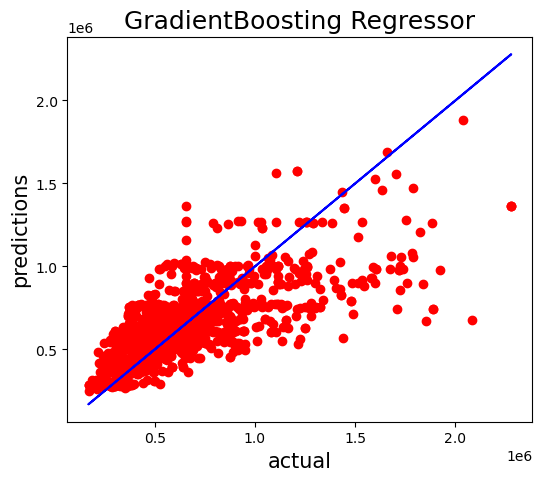

In [112]:
gbr = GradientBoostingRegressor()
gbr=GradientBoostingRegressor(random_state=10)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

regression_results(y_test,y_pred_gbr)
model_accuracy(gbr)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_gbr, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('GradientBoosting Regressor', fontsize = 18)
plt.show()

## Hyperparameter tuning using GridsearchCV

In [116]:
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

In [117]:
grid_search=GridSearchCV(estimator=rand_regressor,cv=10,param_grid=param_grid,verbose=True,n_jobs=-1)

In [118]:
best_clf=grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


In [119]:
best_clf.best_estimator_

RandomForestRegressor(max_features='auto', n_estimators=30)

In [120]:
best_clf.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 30}

Explained_variance:  0.6271
R2:  0.6257
Adjusted_r2:  0.6236
MAE:  110290.2387
MSE:  39290863657.0183
RMSE:  198219.2313
Accuracy: 64.90 %
Standard Deviation: 3.02 %


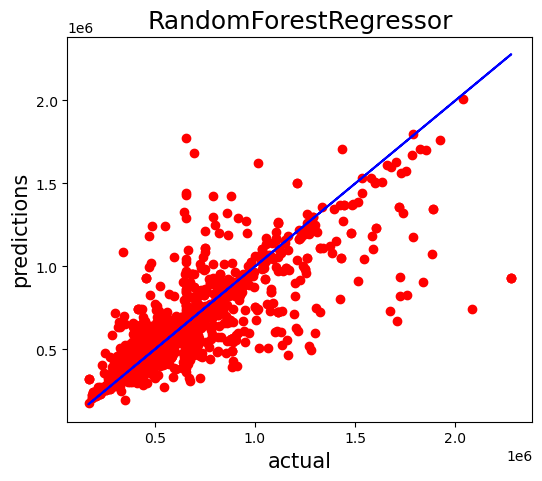

In [121]:
rand_regressor= RandomForestRegressor(bootstrap= True,
                                       max_features='auto',
                                       min_samples_split= 2,
                                       n_estimators=30)
rand_regressor=RandomForestRegressor(random_state=10)
rand_regressor.fit(X_train, y_train)
y_pred_rand_regressor =rand_regressor.predict(X_test)

regression_results(y_test,y_pred_rand_regressor)
model_accuracy(rand_regressor)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_rand_regressor, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('RandomForestRegressor', fontsize = 18)
plt.show()

## Accuracy has inceased positively 

## Saving the model

In [ ]:
filename='car_price_prediction.pkl'
pickle.dump(rand_regressor,open(filename,'wb'))